In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

## Steps to be performed

1. Define Problem statement

2. Gathering Information

3. Visualization of data

4. Checking if Data is stationary or Not, If not stationary - Make it stationary, If stationary- Build models and forecast

4. Model building

5. Evaluation

6. Forecasting the model

In [2]:
time = pd.read_csv("TSData.csv",
                   index_col='Period')
time.head()

,Total
Period,
Jan-00,49045412
Feb-00,49306303
Mar-00,60443541
Apr-00,58286680
May-00,60533783


In [3]:
time.tail(13) #Checking last values

,Total
Period,
Feb-19,71114995
Mar-19,90468975
Apr-19,86675238
May-19,92967337
Jun-19,98264340
Jul-19,102282464
Aug-19,98397810
Sep-19,83798763
Oct-19,88190827


In [4]:
time.describe() #Checking datasets statistics

,Total
count,2.420000e+02
mean,6.910944e+07
std,1.154640e+07
min,3.860172e+07
25%,6.153300e+07
50%,6.828799e+07
75%,7.675590e+07
max,1.022825e+08


In [5]:
time.size #Checking the total number of observations

242

# Visualization

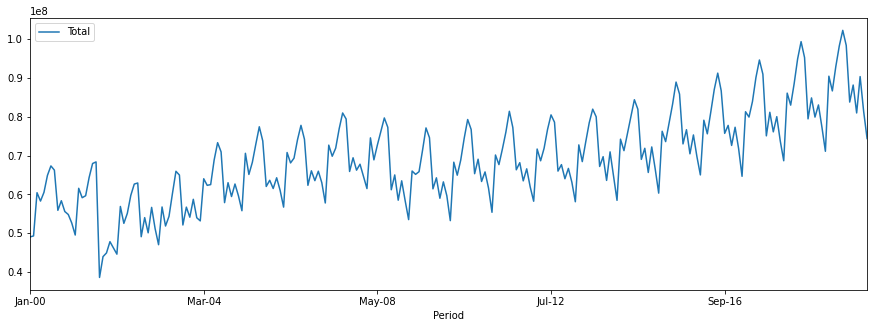

In [6]:
time.plot(kind="line",figsize=(15,5))
plt.show()

#### Details of above plot -

We can see little bit trend present in the dataset and Seasonality present, Will confirm it more with decomposition methods

In [7]:
# Will check for stationarity using Ad fuller test

from statsmodels.tsa.stattools import adfuller

In [8]:
test_result=adfuller(time['Total'])

In [9]:
# Here I am considering H0 as Non stationary, and H1 as stationary
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Total):
    result=adfuller(Total)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [10]:
adfuller_test(time['Total'])

ADF Test Statistic : 0.22321601663657845
p-value : 0.9735340588887252
#Lags Used : 13
Number of Observations Used : 228
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Checking which components are present- using decomposition method

###  Decomposition Methods
•Decomposition methods are based on an analysis of the
individual components of a time series. The strength of
each component is estimated separately and then
substituted into a model that explains the behavior of the
time series.

We have two types of Decomposition methods-

1. Additive: xt = Trend + Seasonal +Cyclic+ Random,
The multiplicative decomposition model is expressed as the product of the four components of a time series: Yt = TRt × St × Ct × It and Is useful when seasonal variation is increasing overtime
2. Multiplicative: xt = Trend * Seasonal* Cyclic * Random 
Another approach is to treat each observation of a time series as the sum of these four components. Yt = TRt + St + Ct + It and Is useful when season variation is relatively constant over time

Here I will try both the models and see the differences

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  
/opt/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_

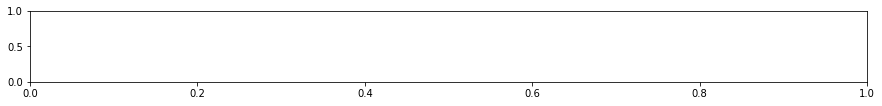

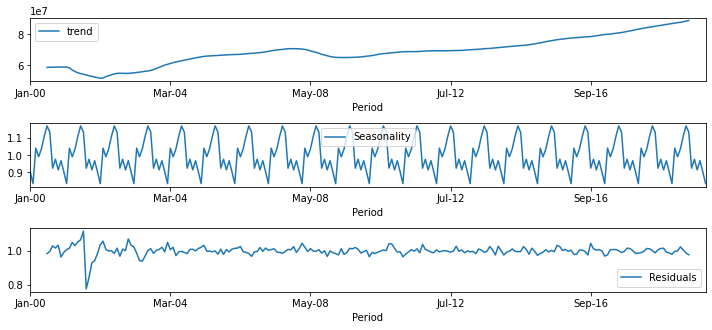

In [11]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  
/opt/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_

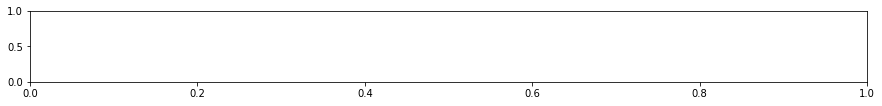

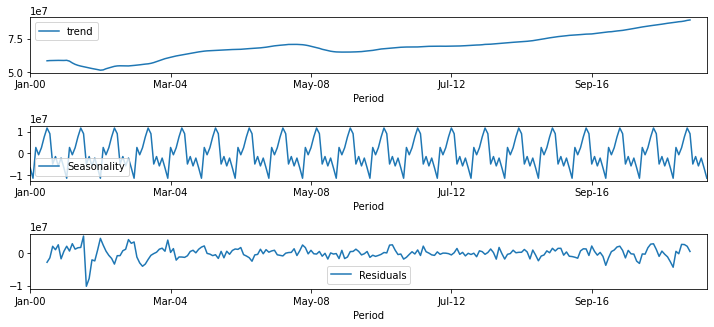

In [12]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Analysis of both the above decomposition methods

From plot we can see there is seasonality present, But also seems trend is there

#### We have few options here , We can use Smoothing techniques to forecast or Make it stationary and Build an ARIMA and SARIMA MODEL
#### I will use Smoothing techniques for now- But later Make it Stationary and Train ARIMA AND SARIMA models also

## Smoothing technique - 

Smoothing techniques remove fluctuations in a
time series. The fluctuations may be due to
seasonal and irregular components, so the result of
removing them from the time series reflects only
the trend and cyclical components

Types of Smoothing techniques -

1.Moving average
2. Centered Moving average
3. Exponential smoothing technique

Types of Exponential smoothing technique

If no trend or Seasonality present, Use Simple Exponential smoothing technique
If trend is present , Use Holt's Trend corrected smoothing technique
If both trend and seasonal components present, use Holt's Winter method


Here We saw while decomposing the components that There was trend present and Seasonality are present there Hence Will use Holt's winter method but Will use other methods

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [14]:
train=time[0:229]  #Spliting into train and test
test=time[229:]

In [15]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['Total'])).fit(smoothing_level = 0.5)
fit1.summary()

Dep. Variable:,endog,No. Observations:,229
Model:,Holt,SSE,10685648704286564.000
Optimized:,True,AIC,7215.536
Trend:,Additive,BIC,7229.271
Seasonal:,None,AICC,7215.914
Seasonal Periods:,None,Date:,"Tue, 16 Jun 2020"
Box-Cox:,False,Time:,03:48:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
smoothing_slope,0.000000,beta,True


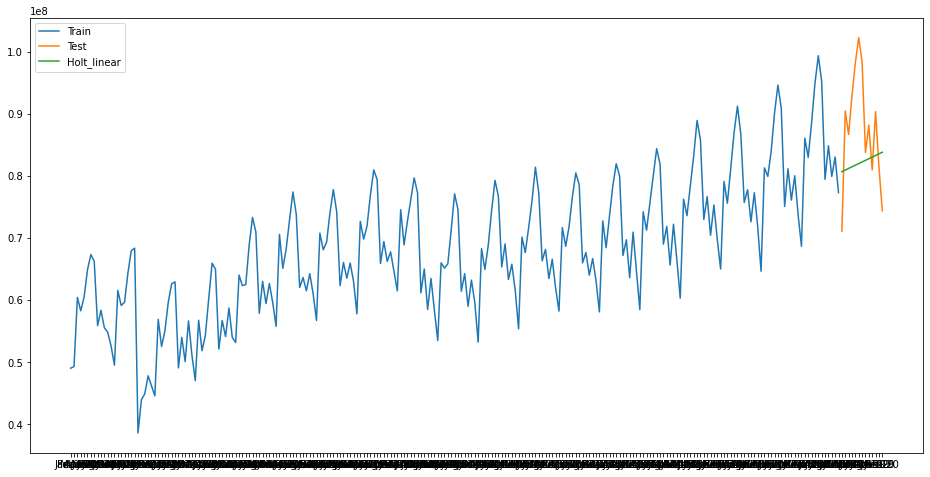

In [16]:

y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Total'], label='Train')
plt.plot(test['Total'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
rmse_trend_smoothing = sqrt(mean_squared_error(test.Total, y_hat_avg.Holt_linear))
print(rmse_trend_smoothing)

10621491.869534679


# Holt's winter smoothing technique for seasonality and trend

In [19]:
y_hat_avg2 = test.copy()
fit2 = ExponentialSmoothing(np.asarray(train['Total']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
fit2.summary()

Dep. Variable:,endog,No. Observations:,229
Model:,ExponentialSmoothing,SSE,13986018416997292.000
Optimized:,True,AIC,7291.173
Trend:,Additive,BIC,7328.944
Seasonal:,Additive,AICC,7292.866
Seasonal Periods:,7,Date:,"Tue, 16 Jun 2020"
Box-Cox:,False,Time:,03:48:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6315789,alpha,True
smoothing_slope,0.0526316,beta,True


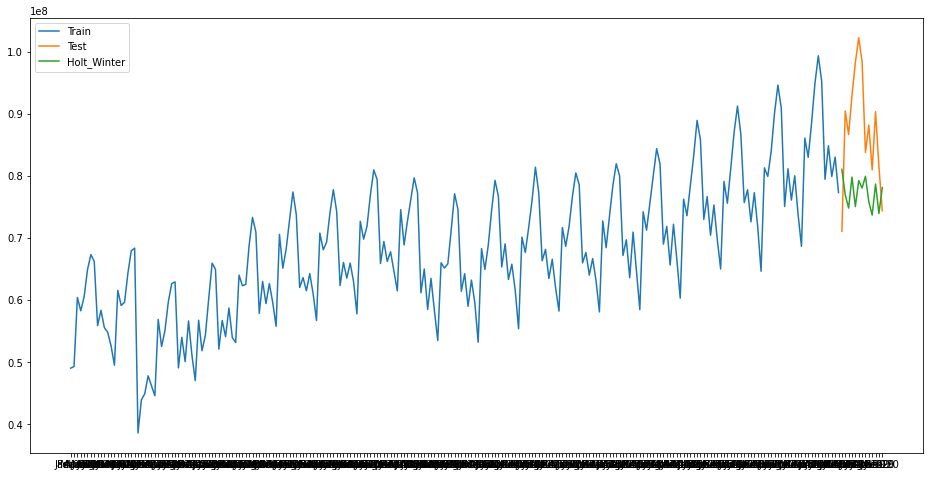

In [20]:

y_hat_avg2['Holt_Winter'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Total'], label='Train')
plt.plot(test['Total'], label='Test')
plt.plot(y_hat_avg2['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [78]:
rmse_trend_Seasonality_smoothing = sqrt(mean_squared_error(test.Total, y_hat_avg2.Holt_Winter))
print(rmse_trend_Seasonality_smoothing)

13876638.261904823


# ARIMA Modeling


Making data stationary before modeling it , Will take differencing of 12 because there is seasonality present in the dataset

In [22]:
time['Total Seasonal Difference'] = time['Total'] - time['Total'].shift(12)


In [23]:
time.head()

,Total,Total Seasonal Difference
Period,,
Jan-00,49045412,NaN
Feb-00,49306303,NaN
Mar-00,60443541,NaN
Apr-00,58286680,NaN
May-00,60533783,NaN


# Applying Dickey Fuller test again

In [24]:

## Again test dickey fuller test
adfuller_test(time['Total Seasonal Difference'].dropna())

ADF Test Statistic : -2.9233981453279814
p-value : 0.042693984629899484
#Lags Used : 13
Number of Observations Used : 216
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


#### Adfuller Test result analysis-

Now P Value is less than 0.05 hence Data is stationary now and Will reject null hypothesis 

# ACF and PACF

ARIMA Model has three parameters p, d, q  where p represent AR, d represents defferencing and q represents Moving average

And Indentification of AR model is done with PACF , Indentification of MA model is done with ACF

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

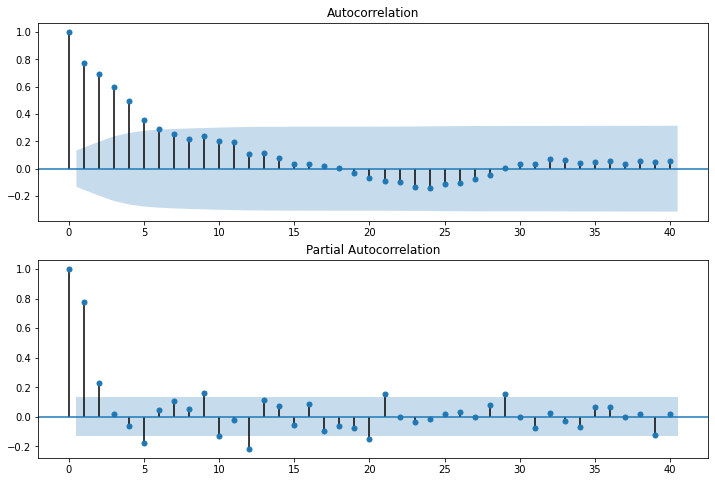

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(time['Total Seasonal Difference'].dropna().iloc[13:],lags=40,ax=ax1) #Using 13 because first 12 values are NA values
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(time['Total Seasonal Difference'].dropna().iloc[13:],lags=40,ax=ax2)

### ACF and PACF result analysis

In [27]:
time.head(13)

,Total,Total Seasonal Difference
Period,,
Jan-00,49045412,NaN
Feb-00,49306303,NaN
Mar-00,60443541,NaN
Apr-00,58286680,NaN
May-00,60533783,NaN
Jun-00,64903295,NaN
Jul-00,67346377,NaN
Aug-00,66256804,NaN
Sep-00,55900504,NaN


In [28]:
New_Time=time.drop(columns='Total', axis=1)

In [29]:
New_Time.head()

,Total Seasonal Difference
Period,
Jan-00,NaN
Feb-00,NaN
Mar-00,NaN
Apr-00,NaN
May-00,NaN


In [30]:
New_Time=New_Time.dropna()

In [31]:
New_Time.head()

,Total Seasonal Difference
Period,
Jan-01,3588942.0
Feb-01,226275.0
Mar-01,1131514.0
Apr-01,864965.0
May-01,-871367.0


In [32]:
#spliting the stationary dataset -

Arima_train=New_Time[0:218]  #Spliting into train and test
Arima_test=New_Time[218:]

In [33]:
New_Time.shape

(230, 1)

In [34]:
Arima_train.shape

(218, 1)

In [35]:
Arima_test.shape

(12, 1)

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [79]:
ARIMA_MODEL = ARIMA(Arima_train, order = (2,1,3))

In [80]:
ARIMA_MODEL_Fit = ARIMA_MODEL.fit()

In [81]:
ARIMA_MODEL_Fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARIMA Model Results                                  
=======================================================================================
Dep. Variable:     D.Total Seasonal Difference   No. Observations:                  217
Model:                          ARIMA(2, 1, 3)   Log Likelihood               -3478.655
Method:                                css-mle   S.D. of innovations        2183410.917
Date:                         Tue, 16 Jun 2020   AIC                           6971.311
Time:                                 07:45:14   BIC                           6994.970
Sample:                                      1   HQIC                          6980.868
                                                                                       
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -5290.2719   1.15e+05     -0.046      0.963   -2.32e+05    2.21e+05
ar.L1.D.Total Seasonal Difference    -0.3907      0.027    -14.698      0.000      -0.443      -0.339
ar.L2.D.Total Seasonal Difference    -0.9862      0.013    -77.472      0.000      -1.011      -0.961
ma.L1.D.Total Seasonal Difference     0.1134      0.078      1.446      0.148      -0.040       0.267
ma.L2.D.Total Seasonal Difference     0.9368        nan        nan        nan         nan         nan
ma.L3.D.Total Seasonal Difference    -0.2010      0.075     -2.664      0.008      -0.349      -0.053
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1981           -0.9873j            1.0070           -0.2815
AR.2           -0.1981           +0.9873j            1.0070            0.2815
MA.1           -0.1572           -0.9876j            1.0000           -0.2751
MA.2           -0.1572           +0.9876j            1.0000            0.2751
MA.3            4.9757           -0.0000j            4.9757           -0.0000
-----------------------------------------------------------------------------
"""

In [82]:
ARIMA_MODEL_Fit.aic

6971.310998215519

In [83]:
Arima_Forecast = ARIMA_MODEL_Fit.forecast(steps = 12)[0]

In [86]:
np.sqrt(mean_squared_error(Arima_test,Arima_Forecast))

1868585.2575958828

In [43]:
# If I compare this result with Exponential method- ARIMA is performing worst than Exponential method


In [44]:
# Trying with other order values

In [45]:
ARIMA_MODEL_2 = ARIMA(train, order = (2,1,4))
ARIMA_MODEL_Fit2 = ARIMA_MODEL_2.fit()
ARIMA_MODEL_Fit2.summary()

/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Total   No. Observations:                  228
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -3871.332
Method:                       css-mle   S.D. of innovations        5574935.773
Date:                Tue, 16 Jun 2020   AIC                           7758.663
Time:                        03:48:54   BIC                           7786.098
Sample:                             1   HQIC                          7769.732
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.241e+05   1.24e+04      9.978      0.000    9.97e+04    1.48e+05
ar.L1.D.Total    -0.6648      0.062    -10.679      0.000      -0.787      -0.543
ar.L2.D.Total    -0.4973      0.061     -8.141      0.000      -0.617      -0.378
ma.L1.D.Total     0.4645      0.049      9.448      0.000       0.368       0.561
ma.L2.D.Total     0.0524      0.067      0.780      0.436      -0.079       0.184
ma.L3.D.Total    -0.6456      0.053    -12.071      0.000      -0.750      -0.541
ma.L4.D.Total    -0.8713      0.061    -14.330      0.000      -0.990      -0.752
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6685           -1.2507j            1.4181           -0.3281
AR.2           -0.6685           +1.2507j            1.4181            0.3281
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.2966           -0.9550j            1.0000           -0.2979
MA.3           -0.2966           +0.9550j            1.0000            0.2979
MA.4           -1.1478           -0.0000j            1.1478           -0.5000
-----------------------------------------------------------------------------
"""

In [46]:
Arima_Forecast2 = ARIMA_MODEL_Fit2.forecast(steps = 12)[0]

In [ ]:
mse = np.sqrt(mean_squared_error(Arima_test,Arima_Forecast2))

In [48]:
print(mse)

78579925.94675155


## Hyper Parameter tuning for ARIMA model

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
p_values = range(0,6)
d_values = range(0,3)
q_values = range(0,6)

In [62]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            arima_train, arima_test = New_Time[0:218], New_Time[218:]
            predictions = list()
            for i in range(len(arima_test)):
                try:
                    model = ARIMA(arima_train, order)
                    model_fit= model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test, predictions)
                    print('rmse = %.2 f'% (order, error))
                except:
                    continue

# SARIMA model

In [65]:
model_S = sm.tsa.SARIMAX(Arima_train, order=(2,1,3), seasonal_order=(2,1,3,12))
model_fit=model_S.fit(disp=True)
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:          Total Seasonal Difference   No. Observations:                  218
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 12)   Log Likelihood               -3286.584
Date:                            Tue, 16 Jun 2020   AIC                           6595.167
Time:                                    07:33:35   BIC                           6631.720
Sample:                                         0   HQIC                          6609.952
                                            - 218                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5488      0.275     -5.641      0.000      -2.087      -1.011
ar.L2         -0.8415      0.329   

In [71]:
forecast = model_fit.forecast(steps=12)
print(forecast)

218    2.438847e+06
219    2.241160e+06
220    3.015368e+06
221    2.433880e+06
222    2.662910e+06
223    2.702916e+06
224    3.498654e+06
225    3.289709e+06
226    2.537229e+06
227    4.034587e+06
228    3.469450e+06
229    3.262626e+06
dtype: float64


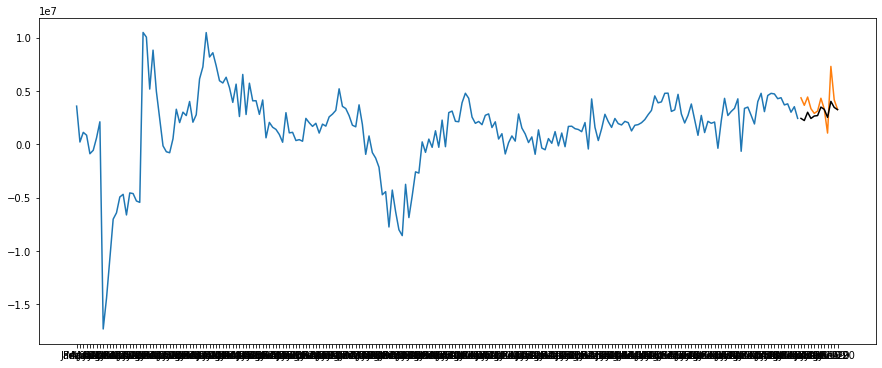

In [72]:
#plot the predictions for validation set
plt.plot(Arima_train, label='Train')
plt.plot(Arima_test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [77]:
print(np.sqrt(mean_squared_error(y_true=Arima_test,y_pred=forecast)))

1383431.9123703397


# Result from every Models 